<a href="https://colab.research.google.com/github/chris-creditdesign/nih-grant-terminations/blob/main/nih_grants_from_google_doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup

In [147]:
df = pd.read_csv("/content/2024-03-31-NIH Grant Terminations_ Auto-Generated - grant_data.csv")

In [148]:
df.head()

,cancellation_source,hhs_reported,self_reported,signal_count,suspect_taggs,changed_end_date,foa_deleted,flag_words,flag_institutions,core_award_number,...,foa_status,foa_title,foa_url,us_rep_phone,award_budget,award_remaining,flagged_words,flagged_institutions,suspect,termination_date
0,Self and HHS reported,True,True,4,True,True,False,True,True,R01MD018340,...,expired,Understanding and Addressing Misinformation am...,https://grants.nih.gov/grants/guide/rfa-files/...,202-225-4001,2356413.0,1051441.22,"black, equitable, mental health, minority, rac...",university of pennsylvania,True,2025-03-20
1,Self and HHS reported,True,True,4,True,True,False,True,True,F31NR020760,...,expired,Ruth L. Kirschstein National Research Service ...,https://grants.nih.gov/grants/guide/pa-files/P...,202-225-4741,96668.0,37712.09,"barrier, barriers, black, discrimination, dive...",johns hopkins,True,2025-03-21
2,Self and HHS reported,True,True,4,True,True,False,True,True,R01AI172092,...,expired,American Women: Assessing Risk Epidemiological...,https://grants.nih.gov/grants/guide/rfa-files/...,202-225-4741,5299769.0,2167554.18,"bias, diverse, equity, excluded, gender, inequ...",johns hopkins,True,2025-03-20
3,Self and HHS reported,True,True,4,True,True,False,True,True,R01NR020437,...,expired,"Innovations in HIV Prevention, Testing, Adhere...",https://grants.nih.gov/grants/guide/pa-files/P...,202-225-4741,3160571.0,868102.77,"barrier, diverse, gender, gender identity, ide...",johns hopkins,True,2025-03-21
4,Self and HHS reported,True,True,4,True,True,False,True,True,R01HD105492,...,expired,NICHD Research Project Grant (R01 - Clinical T...,https://grants.nih.gov/grants/guide/pa-files/P...,202-225-4365,3141989.0,1185406.67,trans,columbia univ,True,2025-03-14


In [149]:
print(f"There are {len(df)} rows in the dataframe.")

There are 3643 rows in the dataframe.


In [189]:
# Drop any rows where the 'cancellation_source' column is not 'HHS reported' or 'Self reported'

df_confirmed = df[df['cancellation_source'].isin(['HHS reported', 'Self reported', 'Self and HHS reported'])]
total_grants_count = len(df_confirmed)
print(f"There are {total_grants_count} rows remaining in the dataframe.")


There are 704 rows remaining in the dataframe.


---

## Number of terminated grants by State

In [152]:
# Count the the number of incidences of each value in the 'org_state' column.

state_count = df_confirmed['org_state'].value_counts().sort_values(ascending=False)

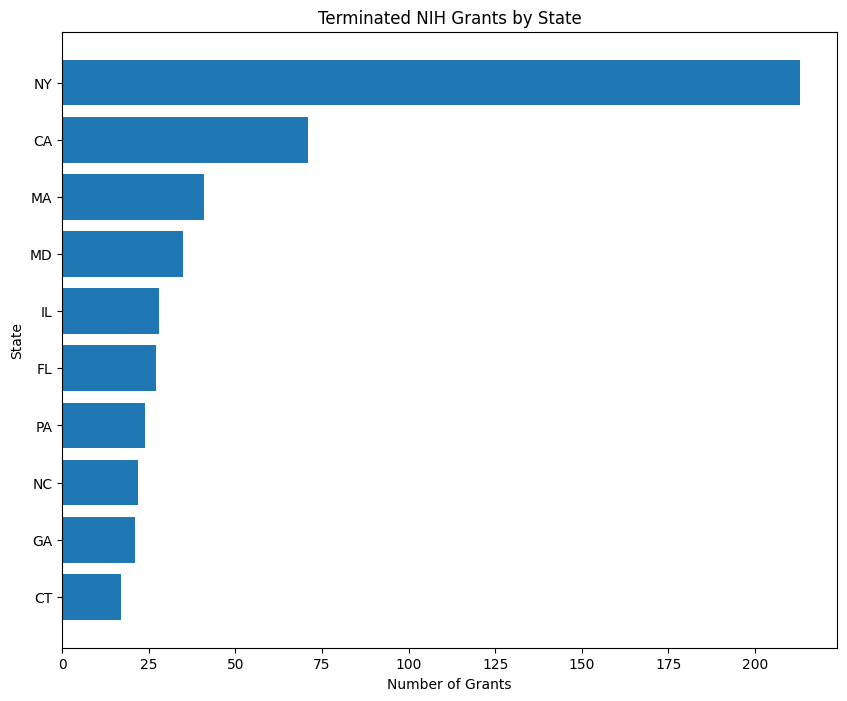

In [153]:
# Create the bar chart with reversed order
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.barh(state_count[:10].index, state_count[:10].values)
plt.xlabel('Number of Grants')
plt.ylabel('State')
plt.title('Terminated NIH Grants by State')

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()


## award_remaining by state

In [345]:
state_award_remaining = df_confirmed.groupby('org_state')['award_remaining'].sum()

In [353]:
state_award_remaining = state_award_remaining.sort_values(ascending=False)

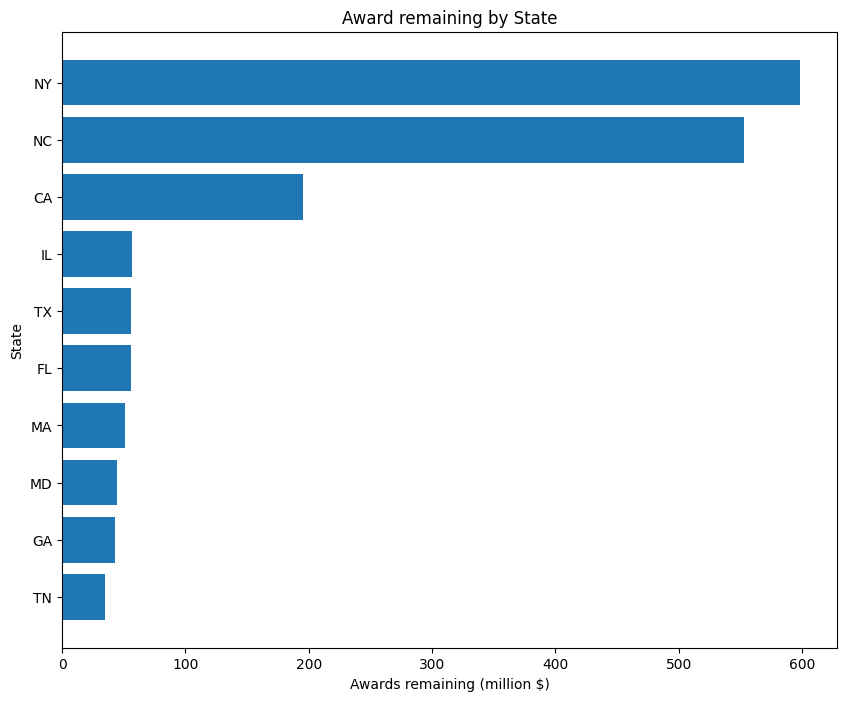

In [350]:
# Create the bar chart with reversed order
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.barh(state_award_remaining[:10].index, state_award_remaining[:10].values)
plt.xlabel('Awards remaining (million $)')
plt.ylabel('State')
plt.title('Award remaining by State')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1000_000)))

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()

## Grants terminated by state - porportion

In [263]:
# Excel file created at: https://report.nih.gov/award/index.cfm?ot=&fy=2024&state=&ic=&fm=&orgid=&distr=&rfa=&om=n&pid=#tab1

df_state_total = pd.read_excel("/content/ABL_20253317549.xlsx")

In [269]:
df_state_total['funding_num'] = df_state_total['FUNDING'].astype(str).str.replace(r'[$,]', '', regex=True)
df_state_total['funding_num'] = pd.to_numeric(df_state_total['funding_num'], errors='coerce')

In [270]:
df_state_total.head()

,LOCATION,AWARDS,FUNDING,funding_num
0,Alabama,722,"$380,343,947",380343947
1,Alaska,24,"$14,833,720",14833720
2,Arizona,593,"$357,034,711",357034711
3,Arkansas,185,"$108,886,839",108886839
4,California,8875,"$5,152,892,129",5152892129


In [275]:
# https://www.ssa.gov/international/coc-docs/states.html
state_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC',
    'Puerto Rico': 'PR',
    'Guam': 'GU',
    'American Samoa': 'AS',
    'U.S. Virgin Islands': 'VI',
    'Northern Mariana Islands': 'MP'
}

In [308]:
df_state_counts = pd.DataFrame({'grant_count': state_count, 'award_remaining': state_award_remaining}).reset_index()


In [309]:
df_state_counts.head()

,org_state,grant_count,award_remaining
0,AK,2,1018039.15
1,AL,5,2917254.87
2,AR,1,1220142.18
3,AZ,4,5357749.42
4,BC,1,643355.94


In [303]:
df_state_total['state_code'] = df_state_total['LOCATION'].map(state_mapping)

In [304]:
df_state_total.head()

,LOCATION,AWARDS,FUNDING,funding_num,state_code
0,Alabama,722,"$380,343,947",380343947,AL
1,Alaska,24,"$14,833,720",14833720,AK
2,Arizona,593,"$357,034,711",357034711,AZ
3,Arkansas,185,"$108,886,839",108886839,AR
4,California,8875,"$5,152,892,129",5152892129,CA


In [411]:
states_merged_df = df_state_total.merge(df_state_counts, left_on='state_code', right_on='org_state')

In [412]:
states_merged_df.head()

,LOCATION,AWARDS,FUNDING,funding_num,state_code,org_state,grant_count,award_remaining
0,Alabama,722,"$380,343,947",380343947,AL,AL,5,2.917255e+06
1,Alaska,24,"$14,833,720",14833720,AK,AK,2,1.018039e+06
2,Arizona,593,"$357,034,711",357034711,AZ,AZ,4,5.357749e+06
3,Arkansas,185,"$108,886,839",108886839,AR,AR,1,1.220142e+06
4,California,8875,"$5,152,892,129",5152892129,CA,CA,71,1.954903e+08


In [413]:
states_merged_df['dollar_percentage'] = round(states_merged_df['award_remaining'] / states_merged_df['funding_num'] * 100)

In [414]:
states_merged_df['awards_percentage'] = round(states_merged_df['grant_count'] / states_merged_df['AWARDS'] * 100)

In [322]:
states_merged_df.head()

,LOCATION,AWARDS,FUNDING,funding_num,state_code,org_state,grant_count,award_remaining,remaining_percentage,awards_percentage
0,Alabama,722,"$380,343,947",380343947,AL,AL,5,2.917255e+06,1.0,1.0
1,Alaska,24,"$14,833,720",14833720,AK,AK,2,1.018039e+06,7.0,8.0
2,Arizona,593,"$357,034,711",357034711,AZ,AZ,4,5.357749e+06,2.0,1.0
3,Arkansas,185,"$108,886,839",108886839,AR,AR,1,1.220142e+06,1.0,1.0
4,California,8875,"$5,152,892,129",5152892129,CA,CA,71,1.954903e+08,4.0,1.0


## Grants terminated by state - porportion Charts

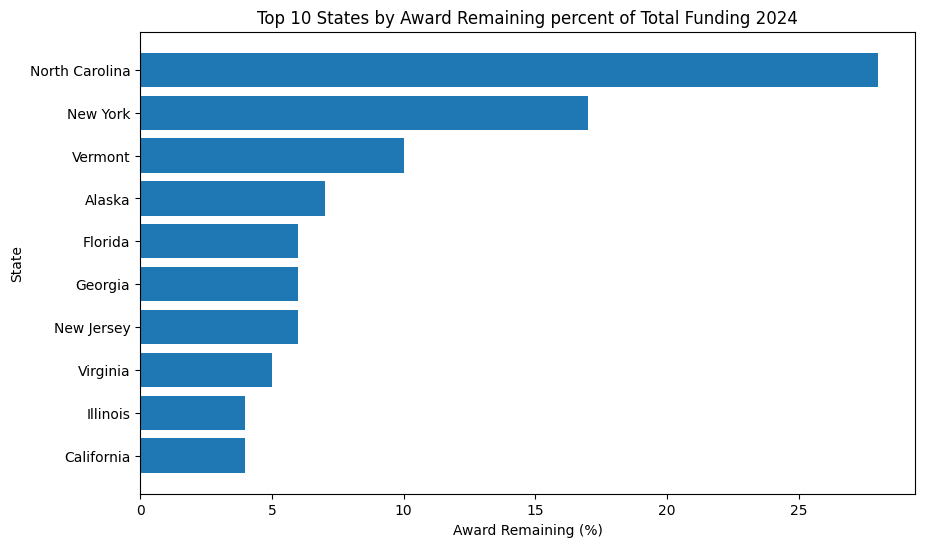

In [415]:
# Sort by award_remaining and get the top 10
top_10_states = states_merged_df.sort_values('dollar_percentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_10_states['LOCATION'], top_10_states['dollar_percentage'])
plt.xlabel('Award Remaining (%)')
plt.ylabel('State')
plt.title('Top 10 States by Award Remaining percent of Total Funding 2024')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
# Format x-axis numbers with commas for thousands
plt.show()


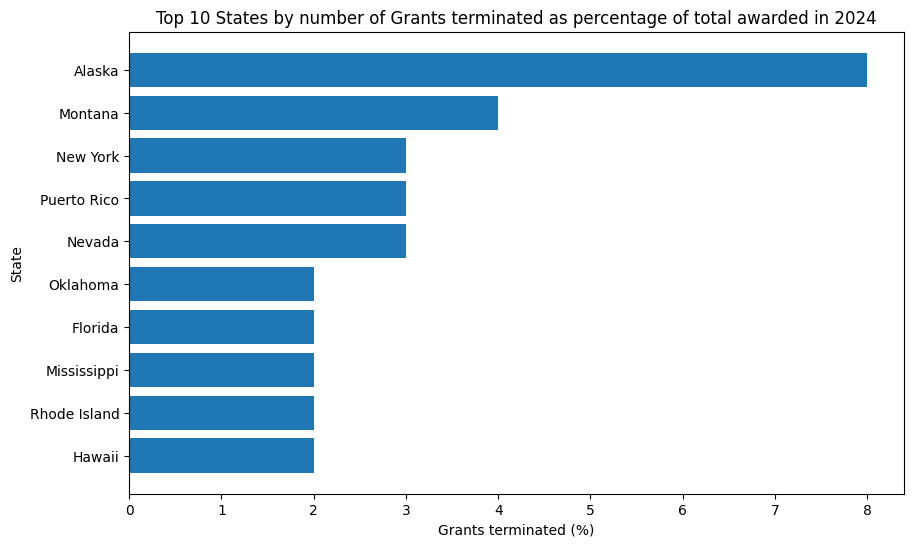

In [416]:
# Sort by award_remaining and get the top 10
top_10_states = states_merged_df.sort_values('awards_percentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_10_states['LOCATION'], top_10_states['awards_percentage'])
plt.xlabel('Grants terminated (%)')
plt.ylabel('State')
plt.title('Top 10 States by number of Grants terminated as percentage of total awarded in 2024')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

---

## No Flagged words

In [154]:
# Create a new dataframe from df, where the 'flagged_words' column in df is empty

df_no_flagged_words = df_confirmed[df_confirmed['flagged_words'].isnull()]


In [155]:
print(f"There are {len(df_no_flagged_words)} cancelled projects with no flagged words")

There are 24 cancelled projects with no flagged words


In [156]:
no_flagged_words_org_name_count = df_no_flagged_words['org_name'].value_counts().sort_values(ascending=False)

In [157]:
print(f"There are {len(no_flagged_words_org_name_count)} organisations with Grants containing no flagged words")

There are 12 organisations with Grants containing no flagged words


## No Flagged words chart

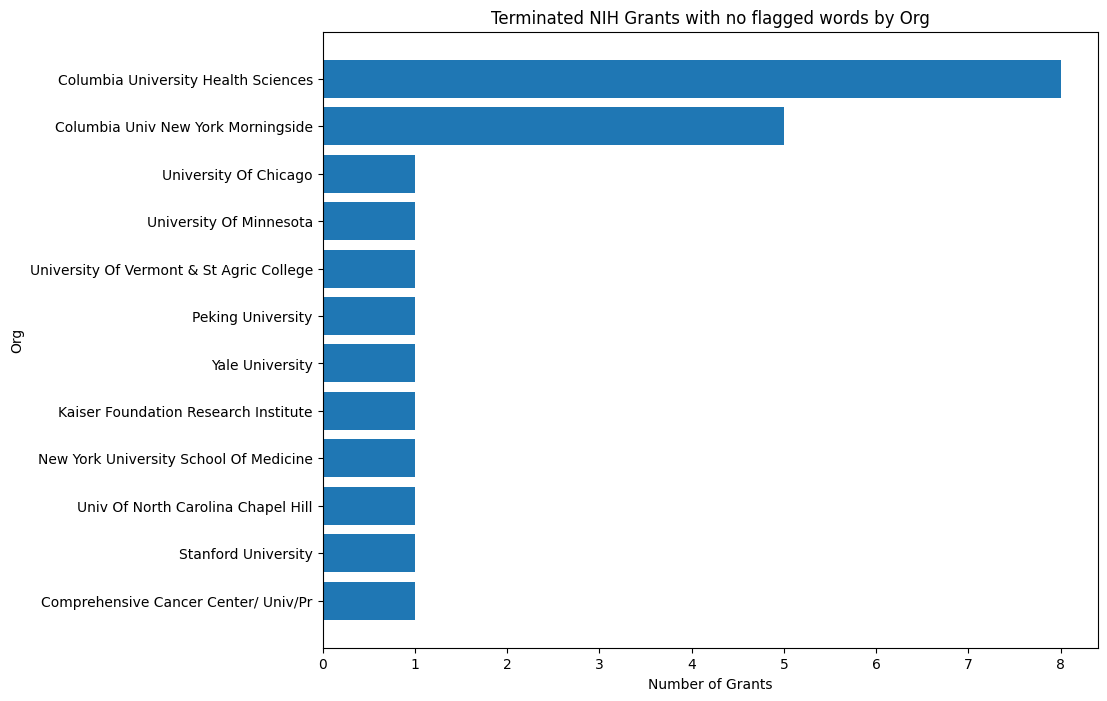

In [158]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.barh(no_flagged_words_org_name_count[:12].index, no_flagged_words_org_name_count[:12].values)
plt.xlabel('Number of Grants')
plt.ylabel('Org')
plt.title('Terminated NIH Grants with no flagged words by Org')

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()


## No flagged words Columbia

In [159]:
# Just no flagged words at Columbia

df_no_flagged_words_columbia = df_no_flagged_words[df_no_flagged_words['org_name'] == 'Columbia University Health Sciences']

In [160]:
print(f"There {len(df_no_flagged_words_columbia['project_title'])} cancelled projects at Columbia with no flagged words.")

There 8 cancelled projects at Columbia with no flagged words.


In [161]:
# Check that the 'flag_words' FALSE value corresponds with no flag words being present
# We would expect the same result as above

test_flag_words = df_confirmed[(df_confirmed['flag_words'] == False) & (df_confirmed['org_name'] == 'Columbia University Health Sciences')]

print(f"There are {len(test_flag_words)} cancelled projects at Columbia with no flagged words.")

There are 8 cancelled projects at Columbia with no flagged words.


In [162]:
# Print project titles from Columbia that have no flagged words

for project_title in df_no_flagged_words_columbia['project_title']:
  print(project_title)

The Behavioral Cost of Carbon
Testing competing models of the computational role of dopamine in hallucinations
Graduate Training in Nutrition
Therapeutic Editing of Rod Glycolysis Rescues Retinal Degeneration
Genetic Approaches to Development and Disease
Neuroepidemiology Training Program
Advanced Graduate Training Program in Theoretical Neuroscience
Pilot


In [163]:
print(f"What is the project with the title \"{df_no_flagged_words_columbia.iloc[7]['project_title']}\"")
print(df_no_flagged_words_columbia.iloc[7]["reporter_url"])



What is the project with the title "Pilot"
https://reporter.nih.gov/project-details/10700012


In [164]:
# Create a new list to store the extracted terms
all_terms = []

# Iterate through the 'terms' column
for terms_string in df_no_flagged_words_columbia["terms"]:
  # Split the string into individual terms using commas as delimiters
  terms_list = [term.strip().lower() for term in str(terms_string).split(',')]

  for term in terms_list:
    all_terms.append(term)

all_terms_series = pd.Series(all_terms)

In [165]:
print(f"There are {len(all_terms_series.value_counts())} unique terms.")

There are 330 unique terms.


In [166]:
all_terms_count = all_terms_series.value_counts().sort_values(ascending=False)

In [177]:
print(all_terms_count[:10])

development           4
training              3
funding               3
modeling              3
patients              3
improved              3
human                 3
research personnel    3
process               3
novel                 3
Name: count, dtype: int64


In [169]:
all_terms_count[all_terms_count > 2].index.to_list()

['development',
 'training',
 'funding',
 'modeling',
 'patients',
 'improved',
 'human',
 'research personnel',
 'process',
 'novel']

In [182]:
all_terms_list = []

# Iterate through the 'terms' column
for terms_string in df_no_flagged_words_columbia["terms"]:
  # Split the string into individual terms using commas as delimiters
  terms_list = [term.strip().lower() for term in str(terms_string).split(',')]
  all_terms_list.append(terms_list)

In [181]:
# Identify terms with frequency greater than 2
common_terms = all_terms_count[all_terms_count > 2].index.to_list()

# Print the common terms
print(common_terms)

['development', 'training', 'funding', 'modeling', 'patients', 'improved', 'human', 'research personnel', 'process', 'novel']


In [183]:
for common_term in common_terms:
  term_present = [common_term in terms for terms in all_terms_list]
  print(f"There are {sum(term_present)} projects with the term '{common_term}':")
  for project_title in df_no_flagged_words_columbia[term_present]["project_title"]:
    print(f"• {project_title}")

  print("\n")

There are 4 projects with the term 'development':
• The Behavioral Cost of Carbon
• Testing competing models of the computational role of dopamine in hallucinations
• Genetic Approaches to Development and Disease
• Pilot


There are 3 projects with the term 'training':
• The Behavioral Cost of Carbon
• Testing competing models of the computational role of dopamine in hallucinations
• Graduate Training in Nutrition


There are 3 projects with the term 'funding':
• The Behavioral Cost of Carbon
• Therapeutic Editing of Rod Glycolysis Rescues Retinal Degeneration
• Pilot


There are 3 projects with the term 'modeling':
• The Behavioral Cost of Carbon
• Testing competing models of the computational role of dopamine in hallucinations
• Therapeutic Editing of Rod Glycolysis Rescues Retinal Degeneration


There are 3 projects with the term 'patients':
• Testing competing models of the computational role of dopamine in hallucinations
• Therapeutic Editing of Rod Glycolysis Rescues Retinal Dege

## Less than 3 flagged words


In [255]:
# Create a new list to a boolean. True represents less than 3 terms
flagged_words_count_less_than_3 = []

# Iterate through the 'flagged_words' column
for flagged_words_string in df_confirmed["flagged_words"]:

  if pd.isnull(flagged_words_string):
    flagged_words_count_less_than_3.append(True)
    continue

  # Split the string into individual terms using commas as delimiters
  flagged_words_list = [flagged_word.strip().lower() for flagged_word in str(flagged_words_string).split(',')]

  flagged_words_count_less_than_3.append(len(flagged_words_list) < 3)

In [250]:
df_less_than_3_flagged_words = df_confirmed[flagged_words_count_less_than_3]

In [256]:
print(f"There are {len(df_less_than_3_flagged_words)} cancelled projects with less than 3 flagged words")

There are 153 cancelled projects with less than 3 flagged words


In [257]:
less_than_3_flagged_words_org_name_count = df_less_than_3_flagged_words['org_name'].value_counts().sort_values(ascending=False)

In [258]:
print(f"There are {len(less_than_3_flagged_words_org_name_count)} organisations with Grants containing less than 3 flagged words")

There are 57 organisations with Grants containing less than 3 flagged words


## Less that 3 flagged words chart

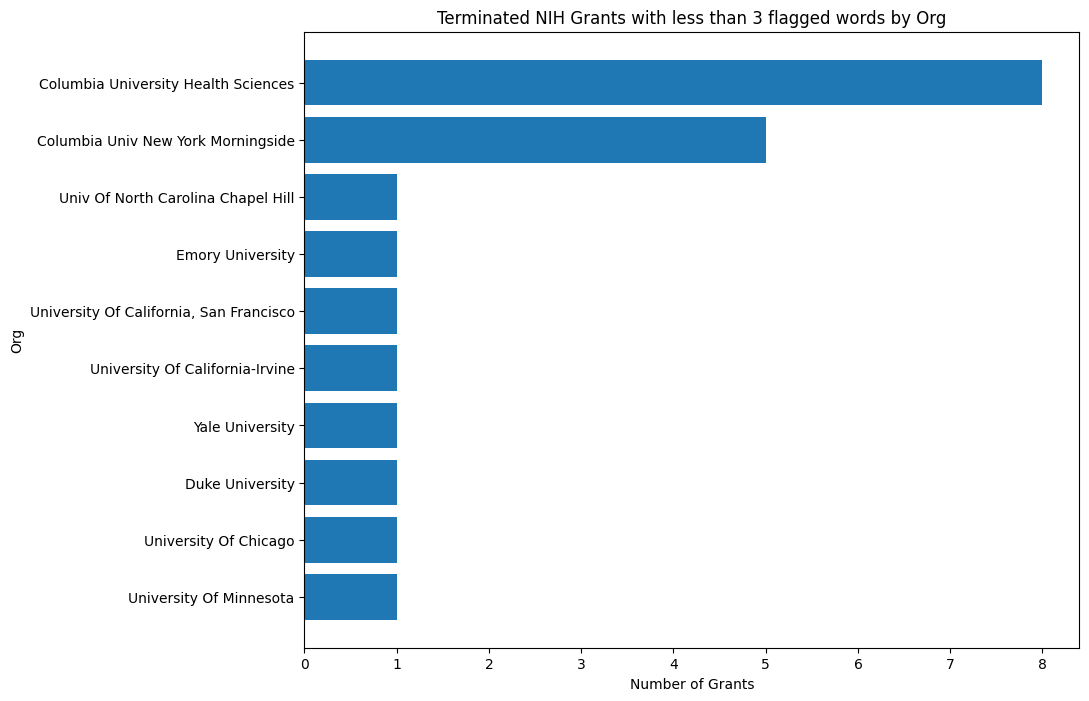

In [260]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.barh(less_than_3_flagged_words_org_name_count[:10].index, no_flagged_words_org_name_count[:10].values)
plt.xlabel('Number of Grants')
plt.ylabel('Org')
plt.title('Terminated NIH Grants with less than 3 flagged words by Org')

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()

## Reporter end date change

`reporter_end_date_change` is the amound of days between the old finish date and the new finish date.

Why is this value not present for some rows that are confirmed as being cancelled.

In [176]:
df_confirmed['reporter_end_date_change'][:20]

,reporter_end_date_change
0,-802.0
1,-193.0
2,-864.0
3,-466.0
4,-443.0
5,-1965.0
6,-101.0
7,-1197.0
8,-1259.0
9,-893.0


## Terms of interest

Proportion of all grants by either total number or award_remaining that have to do with (these are not exclusive so can't do pie chart)

In [188]:
interesting_terms = ['COVID-19', 'SARS-CoV-2', 'Trans', 'HIV', 'Climate']

In [187]:
# Count entries in 'Award Title' that contain 'COVID-19'
covid_19_count = df_confirmed['project_title'].str.contains('COVID-19', case=False, na=False).sum()
covid_19_percentage = round((covid_19_count / len(df_confirmed)) * 100)

print(f"'Award Title' containing 'HIV': {covid_19_count}, which is {covid_19_percentage}%")


Number of entries in 'Award Title' containing 'HIV': 30, which is 4%


In [194]:
interesting_terms_data = []

for term in interesting_terms:
  title_count = df_confirmed['project_title'].str.contains(term, case=False, na=False).sum()
  term_count = df_confirmed['terms'].str.contains(term, case=False, na=False).sum()
  title_percentage = round((title_count / total_grants_count) * 100)
  term_percentage = round((term_count / total_grants_count) * 100)
  print(term)
  print(f"Project title: {title_count} ({title_percentage}%)")
  print(f"Terms: {term_count} ({term_percentage}%)")

  # Append a dictionary for the current term to the list
  interesting_terms_data.append({
      'term': term,
      'title_count': title_count,
      'term_count': term_count,
      'title_percentage': title_percentage,
      'term_percentage': term_percentage
  })

COVID-19
Project title: 30 (4%)
Terms: 123 (17%)
SARS-CoV-2
Project title: 21 (3%)
Terms: 61 (9%)
Trans
Project title: 89 (13%)
Terms: 429 (61%)
HIV
Project title: 109 (15%)
Terms: 232 (33%)
Climate
Project title: 2 (0%)
Terms: 35 (5%)


In [199]:
# Create a Pandas DataFrame from the data list
interesting_terms_df = pd.DataFrame(interesting_terms_data).set_index('term')

## Terms of interest Charts

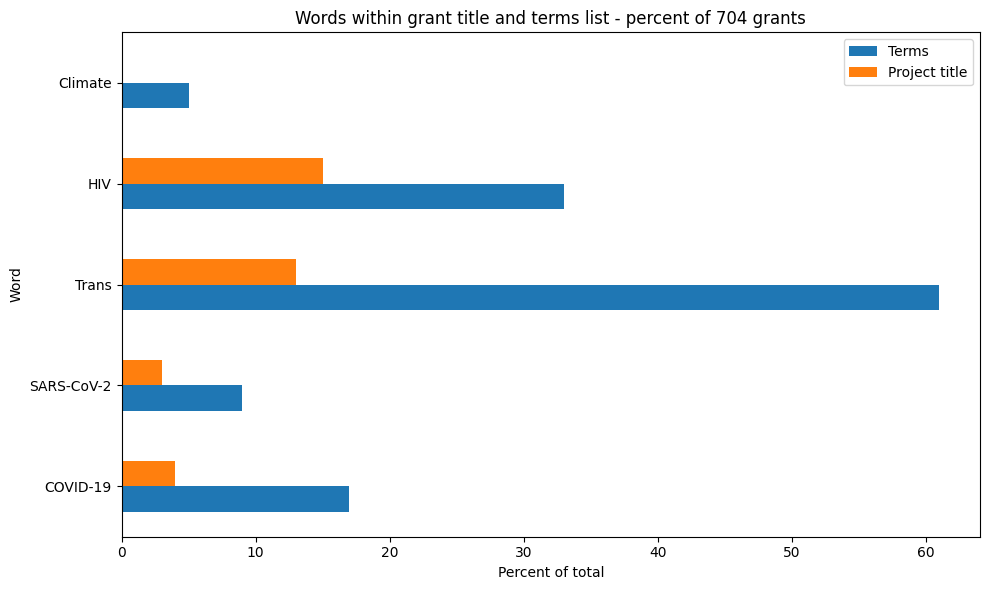

In [214]:
interesting_terms_df[['term_percentage', 'title_percentage']].plot(kind='barh', figsize=(10, 6))

# Customize the plot
plt.xlabel('Percent of total')
plt.ylabel('Word')
plt.title(f"Words within grant title and terms list - percent of {total_grants_count} grants")
plt.legend(['Terms', 'Project title'])
plt.tight_layout()
plt.show()


## Training grants

Grants marked `F31` in column `activity_code` are training grants.




In [219]:
total_training_grants = len(df_confirmed[df_confirmed['activity_code'] == "F31"])
percent_traning_grants = round((total_training_grants / total_grants_count) * 100)

print(f"There are {total_training_grants} grants with 'activity_code' 'F31', {percent_traning_grants}% of total.")

There are 61 grants with 'activity_code' 'F31', 9% of total.


## Termination date over time

In [357]:
df_confirmed['new_reporter_end_date'][:10]

,new_reporter_end_date
0,2025-03-20
1,2025-03-21
2,2025-03-19
3,2025-03-21
4,2025-03-14
5,2025-03-14
6,2025-03-21
7,2025-03-21
8,2025-03-21
9,2025-03-21


In [371]:
# df_confirmed['new_reporter_end_date'] = pd.to_datetime(df_confirmed['new_reporter_end_date'])

end_date_count = df_confirmed['new_reporter_end_date'].value_counts().sort_values(ascending=False).reset_index().sort_values(by='new_reporter_end_date', ascending=True)

In [372]:
end_date_count.head()

,new_reporter_end_date,count
10,2025-02-28,6
11,2025-03-03,3
14,2025-03-07,1
5,2025-03-10,14
8,2025-03-11,7


## Termination date over time Chart

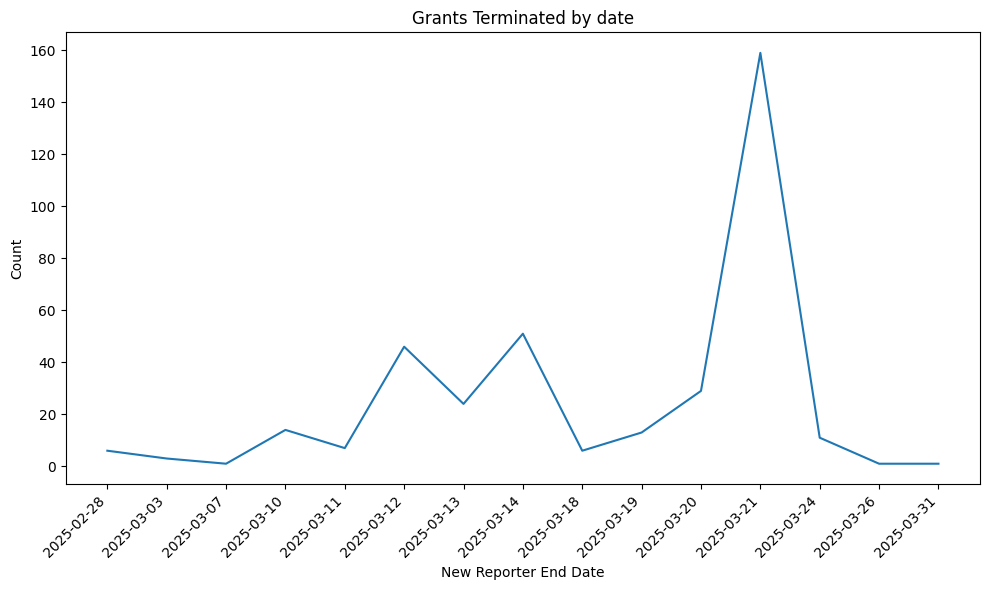

In [375]:
plt.figure(figsize=(10, 6))
plt.plot(end_date_count['new_reporter_end_date'], end_date_count['count'])
plt.xlabel('New Reporter End Date')
plt.ylabel('Count')
plt.title('Grants Terminated by date')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Funding as a proportion of program_office

In [377]:
df_confirmed['program_office'][:10]

,program_office
0,NIMHD
1,NINR
2,NIAID
3,NINR
4,NICHD
5,NICHD
6,NIMH
7,NIAAA
8,NCI
9,NIAAA


In [384]:
program_office_award_remaining = df_confirmed.groupby('program_office')['award_remaining'].sum()

In [385]:
program_office_award_remaining = program_office_award_remaining.sort_values(ascending=False)

In [386]:
len(program_office_award_remaining)

25

In [387]:
program_office_award_remaining[:10]

,award_remaining
program_office,
NIAID,9.439372e+08
NIMHD,1.752825e+08
NCI,1.194483e+08
NIMH,1.120762e+08
NICHD,9.095745e+07
NCATS,8.334793e+07
NIDA,6.371452e+07
NHLBI,6.363116e+07
NIA,4.959803e+07


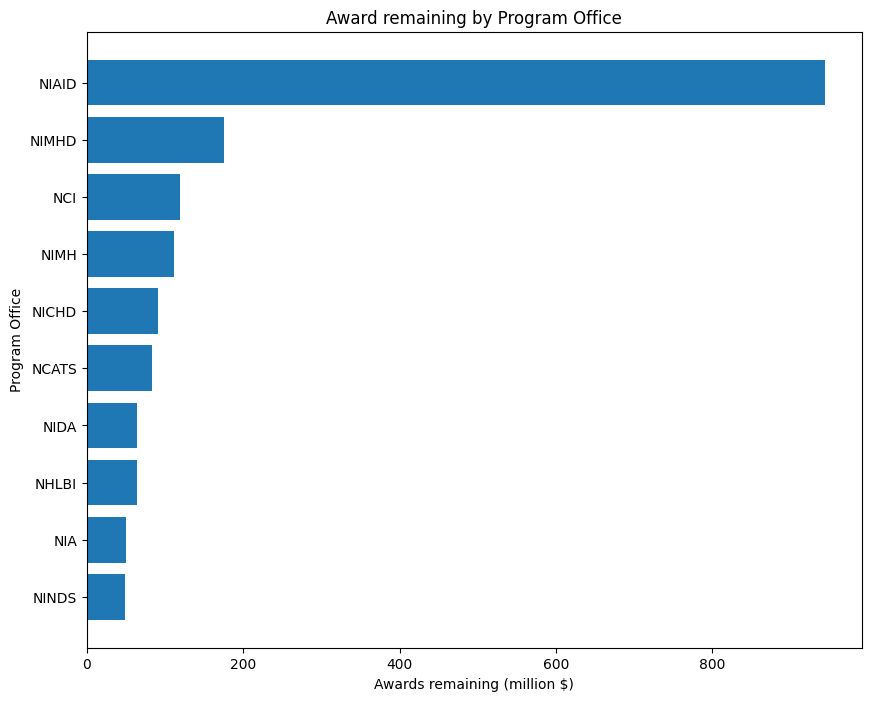

In [388]:
# Create the bar chart with reversed order
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.barh(program_office_award_remaining[:10].index, program_office_award_remaining[:10].values)
plt.xlabel('Awards remaining (million $)')
plt.ylabel('Program Office')
plt.title('Award remaining by Program Office')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1000_000)))

# Invert the y-axis
plt.gca().invert_yaxis()

plt.show()

In [396]:
# Table 2. National Institutes of Health Funding, FY2023-FY2025 - accessed March 31 2025
# https://www.congress.gov/crs-product/R43341

nih_funding_df = pd.read_csv("/content/National Institutes of Health Funding, FY2023-FY2025.csv")

In [398]:
nih_funding_df.head()

,Institutes/Centers,code,FY2023 Final,FY2024 Request,FY2024 Enacted,FY2025 Request
0,Cancer Institute,NCI,7101,7820,7224,7839
1,Heart Lung and Blood Institute,NHLBI,3985,3985,3982,3997
2,Dental/Craniofacial Research,NIDCR,520,520,520,522
3,Diabetes/Digestive/Kidney,NIDDK,2303,2303,2311,2310
4,Neurological Disorders/Stroke,NINDS,2584,2739,2604,2788


In [400]:
program_office_award_remaining.reset_index()
program_office_award_remaining.head()

,award_remaining
program_office,
NIAID,9.439372e+08
NIMHD,1.752825e+08
NCI,1.194483e+08
NIMH,1.120762e+08
NICHD,9.095745e+07


In [403]:
program_office_merged_df = program_office_award_remaining.reset_index().merge(nih_funding_df, left_on='program_office', right_on='code', how='left')


In [404]:
program_office_merged_df.head()

,program_office,award_remaining,Institutes/Centers,code,FY2023 Final,FY2024 Request,FY2024 Enacted,FY2025 Request
0,NIAID,9.439372e+08,Allergy/Infectious Diseases,NIAID,6562.0,6562.0,6562.0,6581.0
1,NIMHD,1.752825e+08,Minority Health/Health Disparities,NIMHD,525.0,525.0,534.0,527.0
2,NCI,1.194483e+08,Cancer Institute,NCI,7101.0,7820.0,7224.0,7839.0
3,NIMH,1.120762e+08,National Institute of Mental Health,NIMH,2117.0,2456.0,2188.0,2503.0
4,NICHD,9.095745e+07,Child Health/Human Development,NICHD,1748.0,1748.0,1759.0,1766.0


In [407]:
program_office_merged_df['remaining_percentage'] = round(program_office_merged_df['award_remaining'] / (program_office_merged_df['FY2024 Enacted'] * 1000_000) * 100)

In [408]:
program_office_merged_df.head()

,program_office,award_remaining,Institutes/Centers,code,FY2023 Final,FY2024 Request,FY2024 Enacted,FY2025 Request,remaining_percentage
0,NIAID,9.439372e+08,Allergy/Infectious Diseases,NIAID,6562.0,6562.0,6562.0,6581.0,14.0
1,NIMHD,1.752825e+08,Minority Health/Health Disparities,NIMHD,525.0,525.0,534.0,527.0,33.0
2,NCI,1.194483e+08,Cancer Institute,NCI,7101.0,7820.0,7224.0,7839.0,2.0
3,NIMH,1.120762e+08,National Institute of Mental Health,NIMH,2117.0,2456.0,2188.0,2503.0,5.0
4,NICHD,9.095745e+07,Child Health/Human Development,NICHD,1748.0,1748.0,1759.0,1766.0,5.0


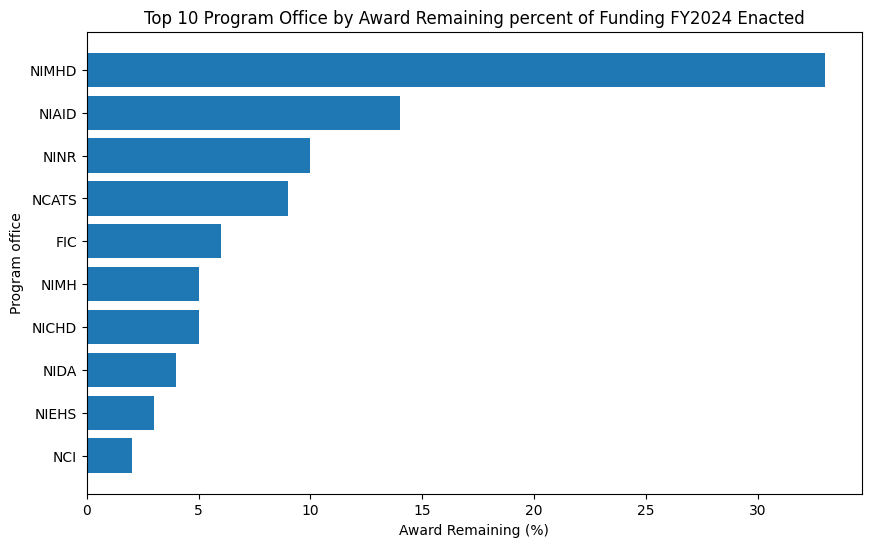

In [409]:
# Sort by award_remaining and get the top 10
top_10_program_office = program_office_merged_df.sort_values('remaining_percentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_10_program_office['code'], top_10_program_office['remaining_percentage'])
plt.xlabel('Award Remaining (%)')
plt.ylabel('Program office')
plt.title('Top 10 Program Office by Award Remaining percent of Funding FY2024 Enacted')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
# Format x-axis numbers with commas for thousands
plt.show()